## Email Spam Detection
<img src = "https://www.easyspace.com/blog/wp-content/uploads/2019/03/spam-1.png">

#### Problem Statement
<blockquote>Given the features in the dataset, using Naive Bayes Classifier, we are to determine whether an email is spam or not.</blockquote>

#### Evaluation Metrics
<blockquote>We will use the accuracy score and F1 score to evaluate the performance of our model.</blockquote>

### 1. Import Libraries

In [37]:
# Import Libraries

import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

# Other libraries
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Let's call our dataframe 'spam'
# 
spam = pd.read_csv('spambase_csv.csv')
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### 2. Explore the dataset

In [39]:
# Using the describe function to get the general description of the data.
spam.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_3d,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_our,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_over,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


In [40]:
# Shape of the datasets
print ("The shape of the spambase data:"+ str(spam.shape))

The shape of the spambase data:(4601, 58)


In [41]:
print (spam.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [42]:
# Check for missing values
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

<blockquote>The data has no missing values</blockquote>

### 3. Tidying the dataset

In [43]:
# Checking for duplicates in the data
print('Presence: ',spam.duplicated(keep = 'first').any())
print('Count: ',spam.duplicated(keep = 'first').sum())

Presence:  True
Count:  391


In [44]:
# Dealing with duplicate values while keeping the first occurence of the record.

spam.drop_duplicates(keep = 'first', inplace = True)

In [45]:
# Shape of the dataset after dropping duplicated rows

print('The datase has ', spam.shape[0], 'rows and ', spam.shape[1], 'columns')

The datase has  4210 rows and  58 columns


### 4. EDA
#### Univariate

Text(0.5, 1.0, 'Spam vs Non_Spam Emails')

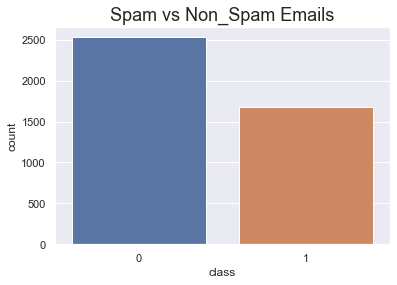

In [62]:
# Plotting the target variable 

sns.set(style="darkgrid")
ax = sns.countplot(x="class", data=spam)
ax.set_title('Spam vs Non_Spam Emails', fontsize=18)

<blockquote>we have more non spam emails compared to spam emails.</blockquote>

#### Test for normality

In [47]:
# First we will verify whether the features are normally distriibuted or not.

# Using the shapiro test, we will test the for normality on the features of our data
# Use a for loop to iterate through all the columns systematically.

# importing the shapiro function
from scipy.stats import shapiro 

for i in spam.columns:

  stat, p = shapiro(spam[i])             # testing for normality

# interpreting the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian')

Sample does not look Gaussian


<blockquote>The data is not normal and so we will have to normalize the data before we do our clasification</blockquote>

### 5. Implementing the Solution
#### Split dataset

In [48]:
# Splitting the data into dependent and independent sets.
X = spam.drop('class', axis = 1)
y = spam['class']

# Splitting our data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

X.shape

(4210, 57)

#### Gaussian Naive Bayes
This type of classifier makes the assumption of normal distribution, thus can be best used in cases when all our features are continuous.

#### Normalize the data

In [49]:
# Normalizing the features 
norm = Normalizer().fit(X)

#### Train our model and fit

In [50]:
# Training our model
# 
gnb = GaussianNB()  
model = gnb.fit(X_train, y_train) 

In [51]:
# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, predicted))

# 2. Using  the accuracy score
print(confusion_matrix(y_test, predicted))
print('The accuracy :',accuracy_score(predicted,y_test))
print('F1 Score :',f1_score(predicted,y_test))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       483
           1       0.75      0.97      0.84       359

    accuracy                           0.85       842
   macro avg       0.86      0.86      0.85       842
weighted avg       0.88      0.85      0.85       842

[[365 118]
 [ 11 348]]
The accuracy : 0.8467933491686461
F1 Score : 0.8436363636363636


<blockquote>Our gaussian model has an f1 score of 84% and an accuracy score of 85% </blockquote>

#### Multinomial Naive Bayes

In [65]:
# Split the dataset 80,20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Training the model.
# Splitting the data into train and test sets

mnb = MultinomialNB().fit(X_train, y_train)

# Predicting
y_pred1 = mnb.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred1))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred1))
print('The accuracy :',accuracy_score(y_pred1,y_test))
print('F1 Score :',f1_score(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       483
           1       0.79      0.74      0.76       359

    accuracy                           0.80       842
   macro avg       0.80      0.80      0.80       842
weighted avg       0.80      0.80      0.80       842

[[411  72]
 [ 93 266]]
The accuracy : 0.8040380047505938
F1 Score : 0.763271162123386


<blockquote>The multinomial NB model has an f1 score of 76.3% and an accuracy score of 80.4% </blockquote>

#### Bernoulli Naive Bayes

In [66]:
# Split the dataset 80,20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 55)

# Training the model.
# Splitting the data into train and test sets

bnb = BernoulliNB().fit(X_train, y_train)

# Predicting
y_pred2 = bnb.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred2))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred2))
print('The accuracy :',accuracy_score(y_pred2,y_test))
print('F1 Score :',f1_score(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       737
           1       0.89      0.83      0.86       526

    accuracy                           0.89      1263
   macro avg       0.89      0.88      0.88      1263
weighted avg       0.89      0.89      0.89      1263

[[680  57]
 [ 87 439]]
The accuracy : 0.8859857482185273
F1 Score : 0.8590998043052838


<blockquote>The Bernoulli NB model has an f1 score of 86% and an accuracy score of 89% </blockquote>

<blockquote>The Bernoulli model has yielded the highest score of the 3 models </blockquote>

### Challenging the Solution

#### Using Support Vector Model Classifier

In [68]:
# Fitting the Support Vector Classifier
# Splitting the data

# Selecting the independent variables and the target variable
x = spam.drop('class', axis = 1)
y = spam['class']

# Instantiating and creating a list of models for iteration
#
from sklearn.svm import SVC
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']

# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, x, y):
  # Splitting the data into training and testing sets
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
  
  # Standardising the data
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.transform(x_test)
  
  # Training the model and making predictions
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc, f1, model

# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, x, y)[0]} and the f1 score is: {predictor(model, x, y)[1]}')

The accuracy score of Polynomial is: 0.7612826603325415 and the f1 score is: 0.6256983240223464
The accuracy score of Linear     is: 0.9216152019002375 and the f1 score is: 0.905982905982906
The accuracy score of Rbf        is: 0.9180522565320665 and the f1 score is: 0.9012875536480687


<blockquote>We observe that SVM Model using the linear kernel has yielded an F1 score of 91% and an accuracy of 92% which is better than the Naive Bayes Classifier for spam detection</blockquote>

### Conclusion
The Bernoulli NB is the best model since it yielded both the best Accuracy and Recall scores.

Optimizing the model is very essential:
<li>Scaling or normalizing the features</li>
<li>Reducing the data dimensions</li>
<li>Increasing the test size for a large dataset.</li>